In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [2]:
pd.set_option('display.max_columns', 500)
pd.options.display.min_rows = 115
df = pd.read_csv('application_data.csv', header=0)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x : str(x).replace('-',''))

In [4]:
df.DAYS_EMPLOYED= df.DAYS_EMPLOYED.apply(lambda x : str(x).replace('-',''))

In [5]:
df.DAYS_BIRTH = df.DAYS_BIRTH.astype(int)
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.astype(int)

In [6]:
df['AGE'] = round(df.DAYS_BIRTH/365)

In [7]:
#dfnew = df[df.columns[1:]].corr()['TARGET'][:]

In [8]:
#dfnew.to_frame().sort_values(by='TARGET')

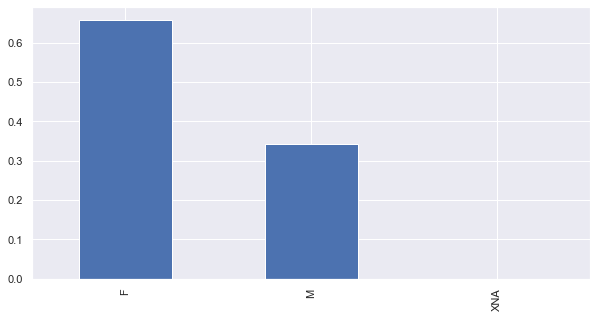

In [9]:
sns.set_theme()
df.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.show()

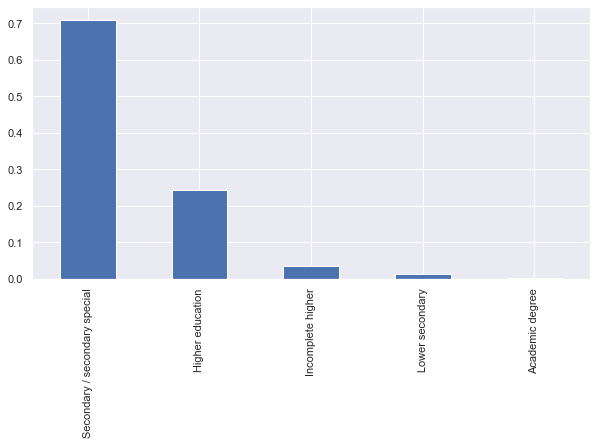

In [10]:
df.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

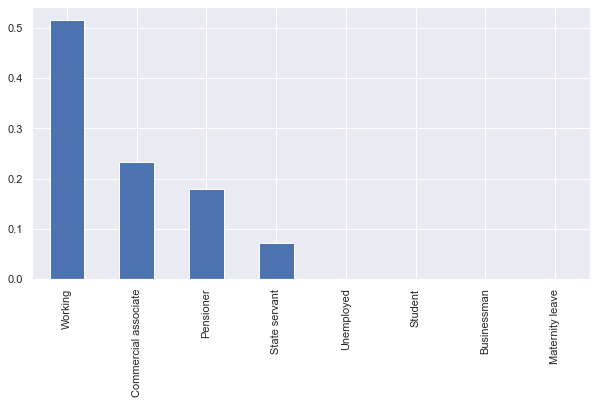

In [11]:
df.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

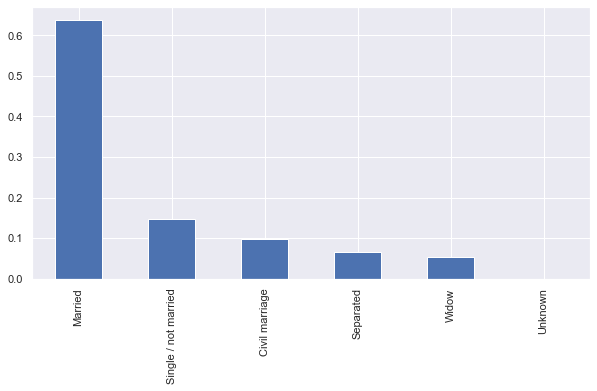

In [12]:
df.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.show()

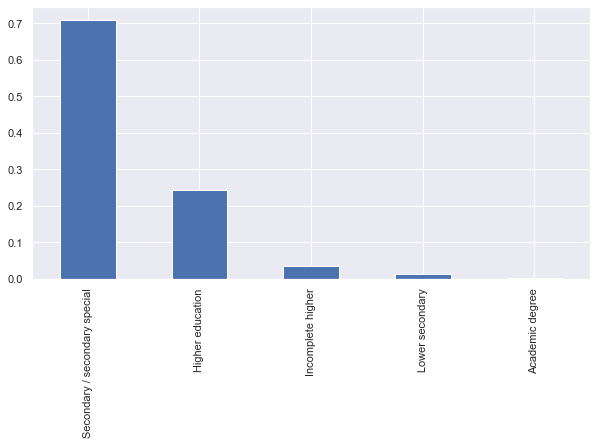

In [13]:
df.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

Inference

65% of the applicants are male and male applicants are more than female applicants

Around 50% of the applicants are from working population

Around 60% of the applicants are married

Around 70% of the applicants have completed secondary education

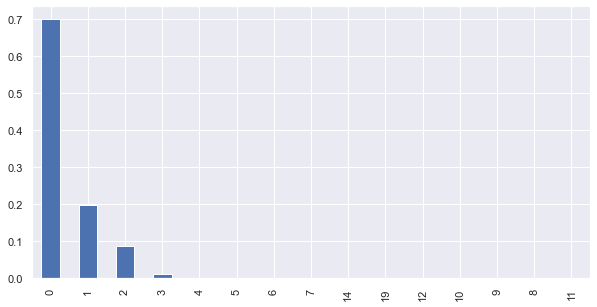

In [14]:
df.CNT_CHILDREN.value_counts(normalize = True).plot.bar()
plt.show()

Inference 

Most of the applicants dont have children

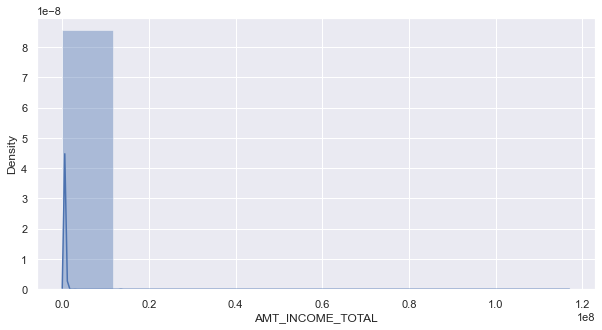

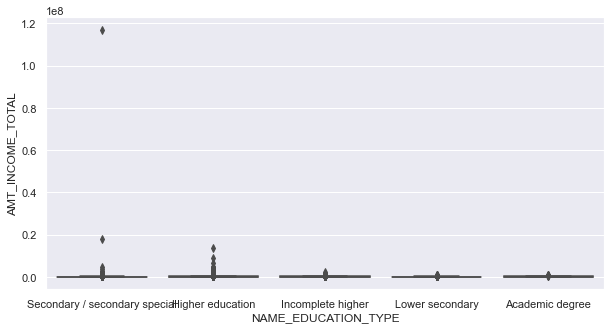

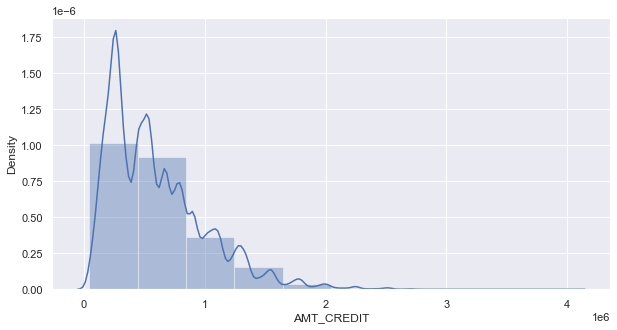

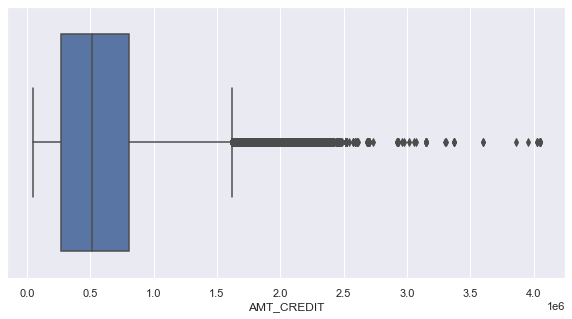

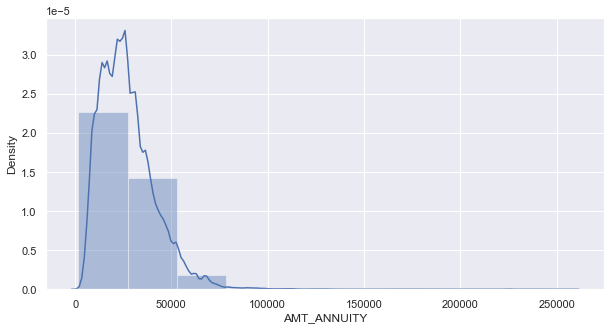

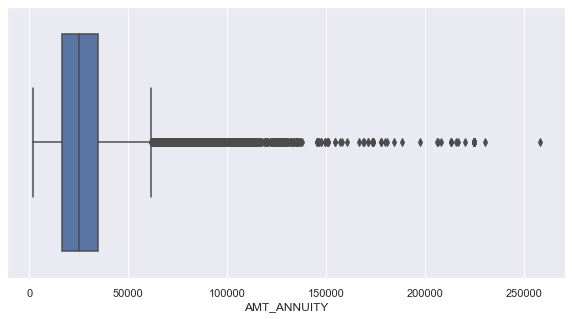

In [15]:

sns.distplot(df.AMT_INCOME_TOTAL, bins = 10)
plt.show()
plt.show()
sns.boxplot( x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL' , data=df)
plt.show()
sns.distplot(df.AMT_CREDIT, bins = 10)
plt.show()
sns.boxplot(df.AMT_CREDIT)
plt.show()
sns.distplot(df.AMT_ANNUITY, bins = 10)
plt.show()
sns.boxplot(df.AMT_ANNUITY)
plt.show()

Inference

Amount income doesnt have normal distribution.secondary education and higher education has more outliers

loan amount is between 0 to 1.7 MM

Annuinty amount is between 0 to 6000

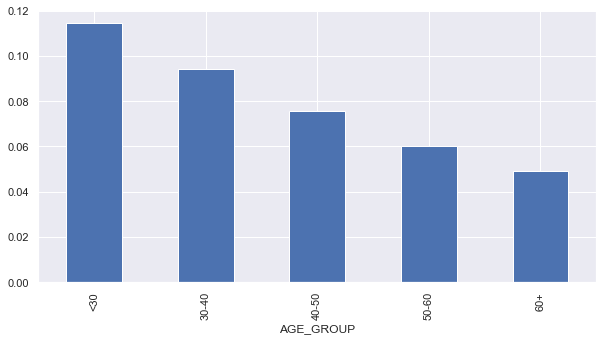

In [16]:
df['AGE_GROUP'] = pd.cut(df.AGE,[0,30,40,50,60,100],labels = ['<30','30-40','40-50','50-60','60+'])
df.groupby('AGE_GROUP')['TARGET'].mean().plot.bar()
plt.show()

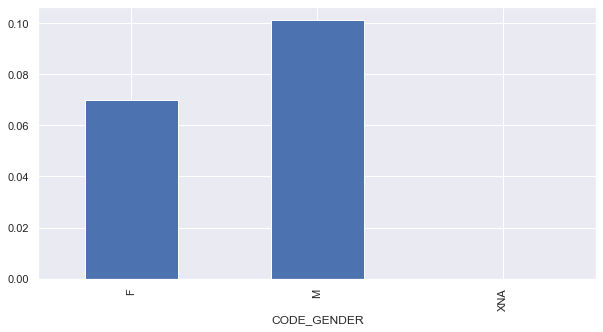

In [17]:
df.groupby('CODE_GENDER')['TARGET'].mean().plot.bar()
plt.show()

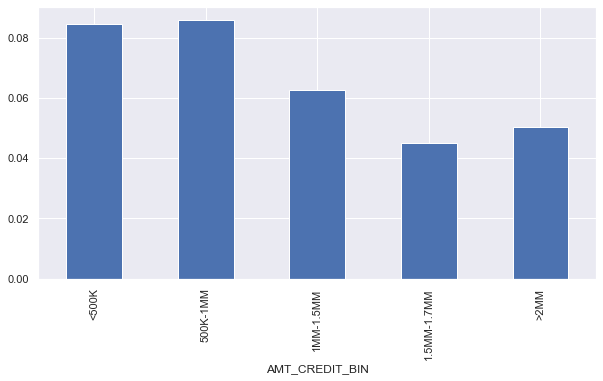

In [18]:
df['AMT_CREDIT_BIN'] = pd.cut(df.AMT_CREDIT,[0,500000,1000000,1500000,1750000,2000000],
                          labels = ['<500K','500K-1MM','1MM-1.5MM','1.5MM-1.7MM','>2MM'])
df.groupby('AMT_CREDIT_BIN')['TARGET'].mean().plot.bar()
plt.show()

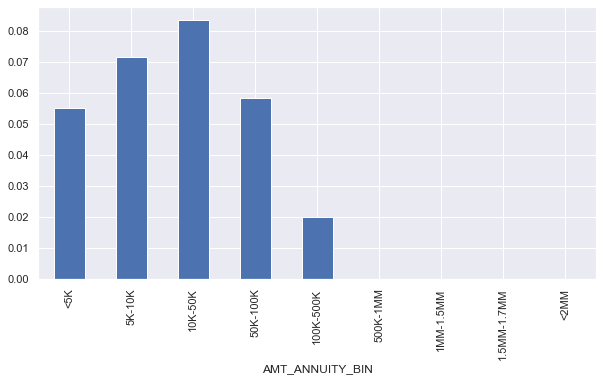

In [19]:
df['AMT_ANNUITY_BIN'] = pd.cut(df.AMT_ANNUITY,[0,5000,10000,50000,100000,500000,1000000,1500000,1750000,2000000],
                          labels = ['<5K','5K-10K','10K-50K','50K-100K','100K-500K','500K-1MM',
                                    '1MM-1.5MM','1.5MM-1.7MM','<2MM'])
df.groupby('AMT_ANNUITY_BIN')['TARGET'].mean().plot.bar()
plt.show()

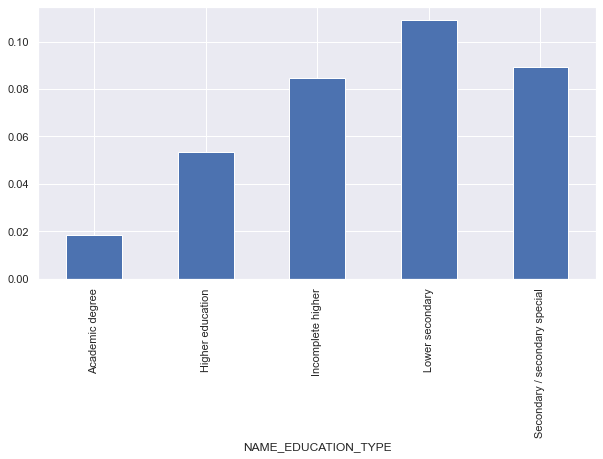

In [20]:
df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.bar()
plt.show()

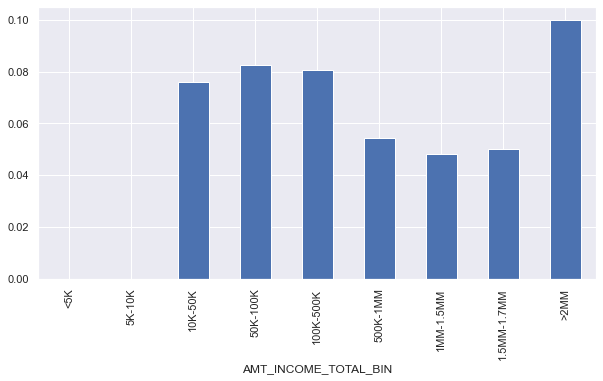

In [21]:
df['AMT_INCOME_TOTAL_BIN'] = pd.cut(df.AMT_INCOME_TOTAL,[0,5000,10000,50000,100000,500000,1000000,1500000,1750000,2000000],
                          labels = ['<5K','5K-10K','10K-50K','50K-100K','100K-500K','500K-1MM',
                                    '1MM-1.5MM','1.5MM-1.7MM','>2MM'])
df.groupby('AMT_INCOME_TOTAL_BIN')['TARGET'].mean().plot.bar()
plt.show()

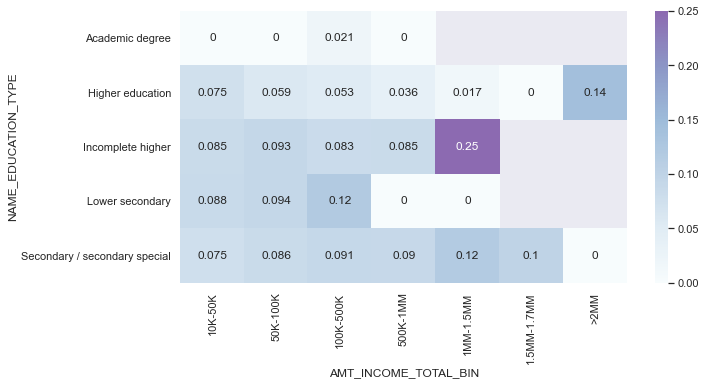

In [28]:
res1 = pd.pivot_table(df, index = 'NAME_EDUCATION_TYPE' , columns = 'AMT_INCOME_TOTAL_BIN',values ='TARGET',aggfunc = np.mean)
sns.heatmap(res1 ,  annot = True , cmap = 'BuPu',center = 0.2)
plt.show()

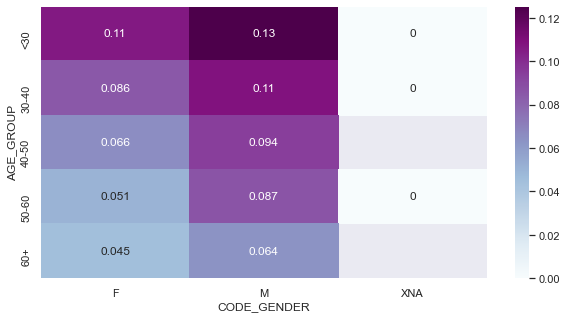

In [34]:
res1 = pd.pivot_table(df, index = 'AGE_GROUP' , columns = 'CODE_GENDER',values ='TARGET',aggfunc = np.mean)
sns.heatmap(res1 ,  annot = True , cmap = 'BuPu')
plt.show()

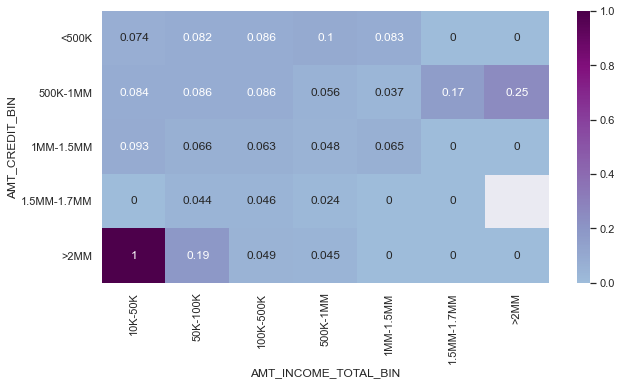

In [29]:
res1 = pd.pivot_table(df, index = 'AMT_CREDIT_BIN' , columns = 'AMT_INCOME_TOTAL_BIN',values ='TARGET',aggfunc = np.mean)
sns.heatmap(res1 ,  annot = True , cmap = 'BuPu',center = 0.2)
plt.show()

In [23]:
df_prev = pd.read_csv('previous_application.csv', header=0)
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F